In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from pykrige.ok import OrdinaryKriging
import seaborn as sns

In [2]:
# Try using 'ISO-8859-1' or 'cp1252' if 'ISO-8859-1' does not work
with open("wgi_feb2012.csv", "r", encoding="ISO-8859-1") as f:
    df = pd.read_csv(f)

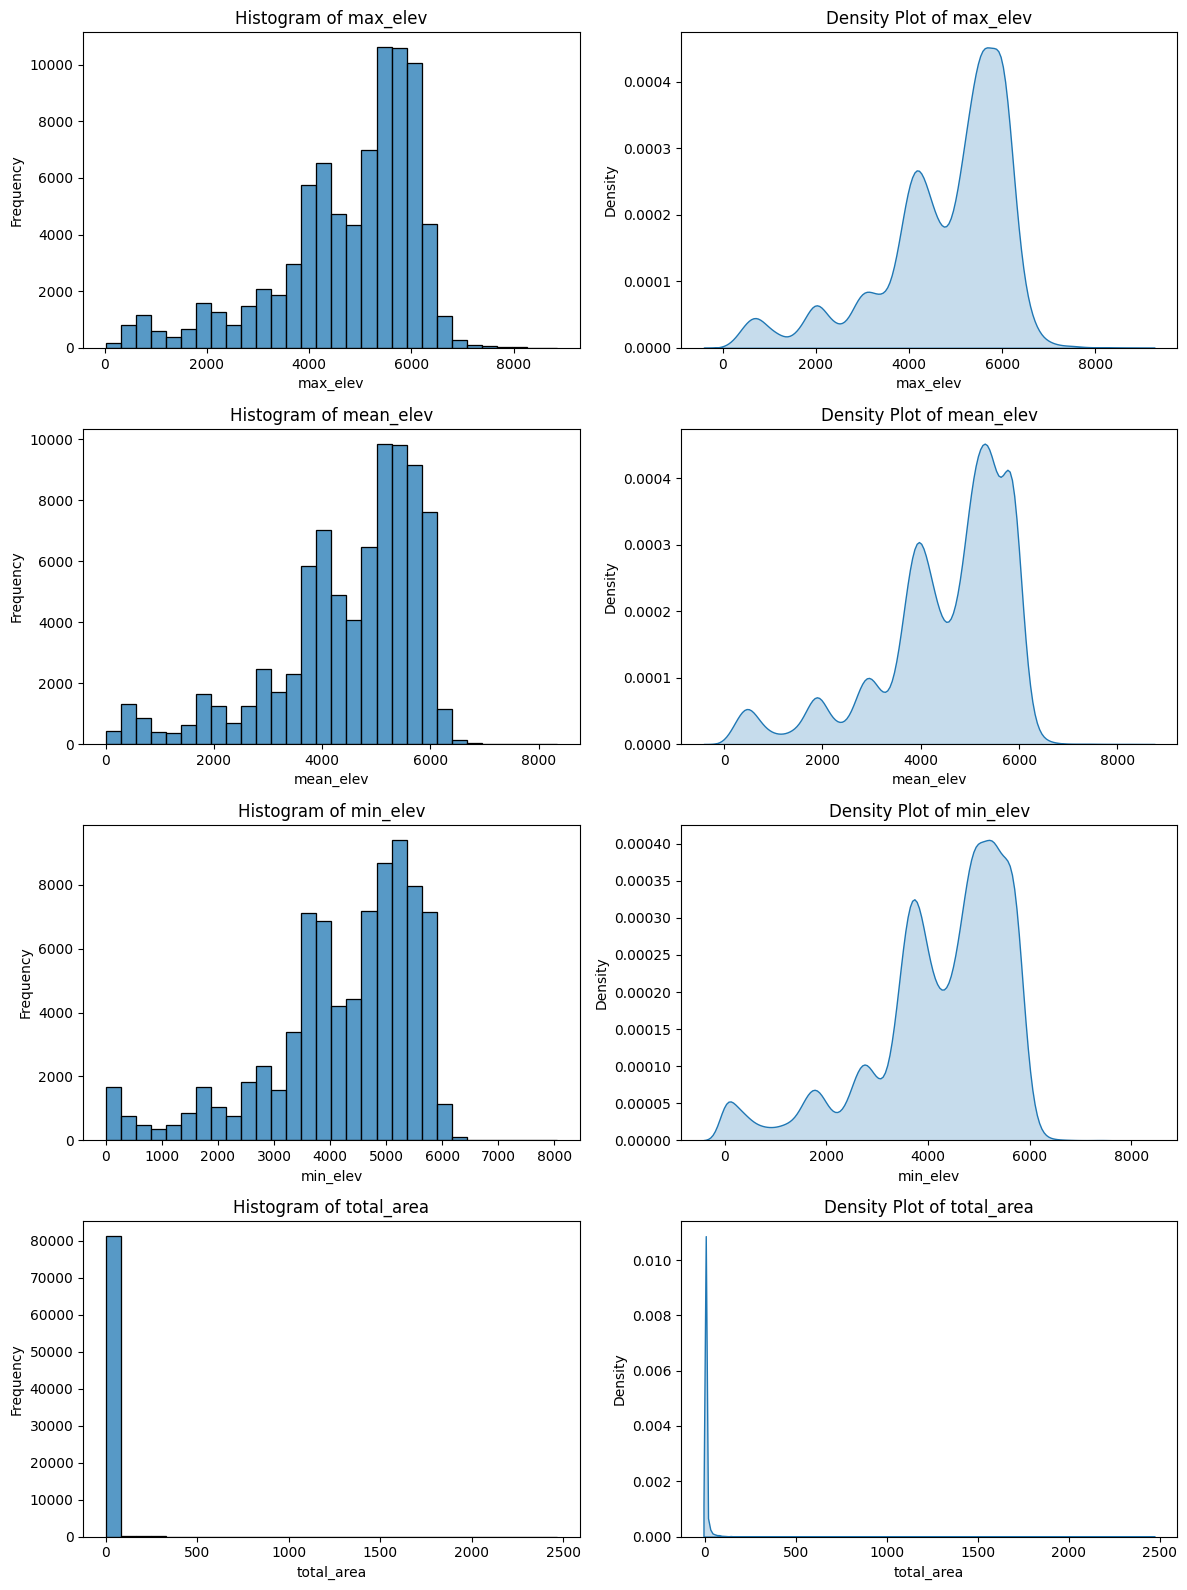

In [3]:
# Load the data
df = pd.read_csv("wgi_feb2012.csv", encoding="ISO-8859-1")

# Selecting relevant numerical variables
selected_columns = ['max_elev', 'mean_elev', 'min_elev', 'total_area']
df_selected = df[selected_columns]

# Dropping rows with missing values in the selected columns
df_selected = df_selected.dropna()

# Plotting histograms and density plots for each selected variable
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

for i, column in enumerate(selected_columns):
    # Histogram
    sns.histplot(df_selected[column], bins=30, kde=False, ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {column}')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Frequency')
    
    # Density Plot
    sns.kdeplot(df_selected[column], ax=axs[i, 1], fill=True)
    axs[i, 1].set_title(f'Density Plot of {column}')
    axs[i, 1].set_xlabel(column)
    axs[i, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [5]:
# Load the data
df = pd.read_csv("wgi_feb2012.csv", encoding="ISO-8859-1")

# Filter out rows where latitude or longitude or the variable of interest is missing
df = df.dropna(subset=['lat', 'lon', 'mean_elev'])

# Convert coordinates to float, in case they are not
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

# Extract the necessary data
latitude = df['lat'].values
longitude = df['lon'].values
mean_elevation = df['mean_elev'].values

# Create a grid of points on which to compute the semi-variogram
grid_lon = np.linspace(np.min(longitude), np.max(longitude), 100)
grid_lat = np.linspace(np.min(latitude), np.max(latitude), 100)

# Instantiate Ordinary Kriging object
OK = OrdinaryKriging(longitude, latitude, mean_elevation,
                     variogram_model='spherical',
                     verbose=False, enable_plotting=False)

# Generate semi-variogram
semivariance, lags = OK.calculate_semivariance()

# Plotting the semi-variogram
plt.figure(figsize=(10, 5))
plt.plot(lags, semivariance, 'bo-')
plt.title('Semi-Variogram (mean_elev)')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.grid(True)
plt.show()

: 

In [ ]:
# Load the data
df = pd.read_csv("wgi_feb2012.csv", encoding="ISO-8859-1")

# Filter out rows where latitude or longitude or the variable of interest is missing
df = df.dropna(subset=['lat', 'lon', 'mean_elev'])

# Convert coordinates to float, in case they are not
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

# Randomly sample 10% of the data
df_sampled = df.sample(frac=0.1, random_state=42)
latitude = df_sampled['lat'].values
longitude = df_sampled['lon'].values
mean_elevation = df_sampled['mean_elev'].values

grid_lon = np.linspace(np.min(longitude), np.max(longitude), 50)  # Reduce to 50 points
grid_lat = np.linspace(np.min(latitude), np.max(latitude), 50)

OK = OrdinaryKriging(longitude, latitude, mean_elevation,
                     variogram_model='spherical',
                     verbose=False, enable_plotting=False,
                     n_closest_points=50)  # Limit points for performance

# Generate semi-variogram
semivariance, lags = OK.calculate_semivariance()

# Plotting the semi-variogram
plt.figure(figsize=(10, 5))
plt.plot(lags, semivariance, 'bo-')
plt.title('Semi-Variogram (mean_elev)')
plt.xlabel('Lag Distance')
plt.ylabel('Semivariance')
plt.grid(True)
plt.show()

Variance of selected variables:
max_elev     1.911664e+06
mean_elev    1.806537e+06
min_elev     1.799669e+06
dtype: float64

Covariance matrix of selected variables:
               max_elev     mean_elev      min_elev
max_elev   1.911664e+06  1.835001e+06  1.777117e+06
mean_elev  1.835001e+06  1.806537e+06  1.783351e+06
min_elev   1.777117e+06  1.783351e+06  1.799669e+06


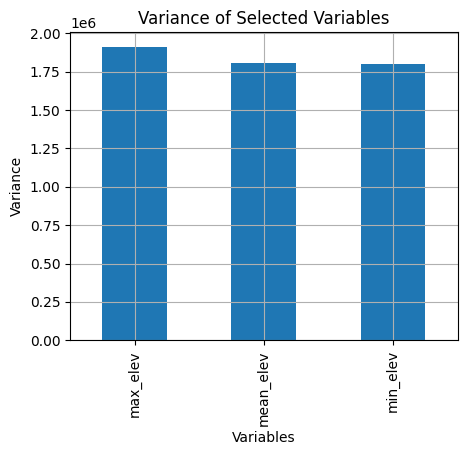

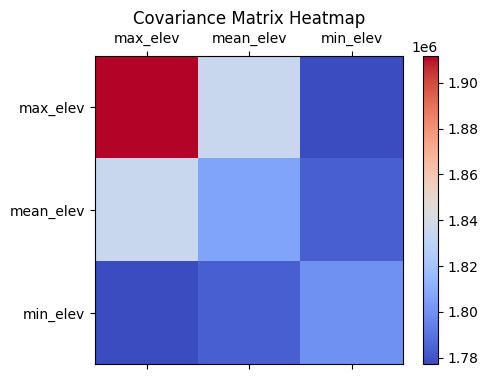

In [6]:
# Load the data
df = pd.read_csv("wgi_feb2012.csv", encoding="ISO-8859-1")

# Selecting relevant numerical variables
selected_columns = ['max_elev', 'mean_elev', 'min_elev']
df_selected = df[selected_columns]

# Dropping rows with missing values in the selected columns
df_selected = df_selected.dropna()

# Calculating variance and covariance
variance = df_selected.var()
covariance_matrix = df_selected.cov()

# Print variance and covariance matrix
print("Variance of selected variables:")
print(variance)
print("\nCovariance matrix of selected variables:")
print(covariance_matrix)

# Plotting the variance
plt.figure(figsize=(5, 4))
variance.plot(kind='bar')
plt.title('Variance of Selected Variables')
plt.ylabel('Variance')
plt.xlabel('Variables')
plt.grid(True)
plt.show()

# Plotting the covariance matrix as a heatmap
fig, ax = plt.subplots(figsize=(5, 4))
cax = ax.matshow(covariance_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(range(len(selected_columns)))
ax.set_yticks(range(len(selected_columns)))
ax.set_xticklabels(selected_columns)
ax.set_yticklabels(selected_columns)
plt.title('Covariance Matrix Heatmap')
plt.show()

In [ ]:
import seaborn as sns

In [9]:
# Load the dataset
df = pd.read_csv("wgi_feb2012.csv", encoding='ISO-8859-1')

# Ensure no missing values interfere in the calculations
df = df[['max_elev', 'mean_depth']].dropna()

In [ ]:
# Variance
var_max_elev = df['max_elev'].var()
var_mean_depth = df['mean_depth'].var()

print(f"Variance of Max Elevation: {var_max_elev:.2f}")
print(f"Variance of Mean Depth: {var_mean_depth:.2f}")

# Covariance
covariance = df[['max_elev', 'mean_depth']].cov()
print("\nCovariance between Max Elevation and Mean Depth:")
print(covariance)

In [ ]:
# Calculating variogram for lag of 1 for simplicity in a sorted dataset
df_sorted = df.sort_values(by='max_elev')
variogram_value = 0.5 * np.mean(np.diff(df_sorted['mean_depth'])**2)

print(f"\nVariogram value for mean_depth based on max_elev sorting: {variogram_value:.2f}")

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df['max_elev'], df['mean_depth'], alpha=0.5, color='green')
plt.title('Scatter Plot of Maximum Elevation vs Mean Depth')
plt.xlabel('Maximum Elevation (meters)')
plt.ylabel('Mean Depth (meters)')
plt.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5))

ax[0].hist(df['max_elev'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Histogram of Maximum Elevation')
ax[0].set_xlabel('Maximum Elevation (meters)')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['mean_depth'], bins=30, color='red', alpha=0.7)
ax[1].set_title('Histogram of Mean Depth')
ax[1].set_xlabel('Mean Depth (meters)')

plt.tight_layout()
plt.show()

In [15]:
# Remove high depths

In [16]:

# Load the dataset
df = pd.read_csv("wgi_feb2012.csv", encoding='ISO-8859-1')

# Filtering out entries where 'mean_depth' is greater than 1000
df = df[df['mean_depth'] <= 1000]

# Drop any remaining missing values for the columns of interest
df = df[['max_elev', 'mean_depth']].dropna()

In [ ]:
# Variance
var_max_elev = df['max_elev'].var()
var_mean_depth = df['mean_depth'].var()

print(f"Variance of Max Elevation: {var_max_elev:.2f}")
print(f"Variance of Mean Depth: {var_mean_depth:.2f}")

# Covariance
covariance = df[['max_elev', 'mean_depth']].cov()
print("\nCovariance between Max Elevation and Mean Depth:")
print(covariance)

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(df['max_elev'], df['mean_depth'], alpha=0.5, color='green')
plt.title('Scatter Plot of Maximum Elevation vs Mean Depth')
plt.xlabel('Maximum Elevation (meters)')
plt.ylabel('Mean Depth (meters)')
plt.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5))

ax[0].hist(df['max_elev'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Histogram of Maximum Elevation')
ax[0].set_xlabel('Maximum Elevation (meters)')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['mean_depth'], bins=30, color='red', alpha=0.7)
ax[1].set_title('Histogram of Mean Depth')
ax[1].set_xlabel('Mean Depth (meters)')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming data is loaded into a DataFrame 'df'
df_sorted = df.sort_values('max_elev')
differences = np.diff(df_sorted['mean_depth'])  # Consecutive differences
squared_differences = differences**2
variogram = (1 / (2 * len(differences))) * np.sum(squared_differences)
variogram

In [ ]:
# Sample data - replace this with your actual DataFrame
# Assuming df is your DataFrame with the columns 'max_elev' and 'mean_depth'
x = df['max_elev']
y = df['mean_depth']

# Ensure positive values if using log scale
x = np.maximum(x, 0.1)  # Replace 0 or negative values with 0.1
y = np.maximum(y, 0.1)

# Create grid of points at which to calculate the CDF
x_values = np.logspace(np.log10(min(x)), np.log10(max(x)), num=100)
y_values = np.logspace(np.log10(min(y)), np.log10(max(y)), num=100)
x_grid, y_grid = np.meshgrid(x_values, y_values)

# Calculate CDF at each point in the grid
cdf_grid = np.array([[np.mean((x <= x_val) & (y <= y_val)) for x_val in x_values] for y_val in y_values])

# Plot the joint CDF as a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cdf_grid, origin='lower', 
                extent=[min(x_values), max(x_values), min(y_values), max(y_values)], 
                aspect='auto', cmap='Blues', norm=colors.LogNorm(vmin=np.min(cdf_grid[cdf_grid>0]), vmax=np.max(cdf_grid)),
                interpolation='nearest')  # Adjust interpolation for smoother appearance
ax.set_title('Joint CDF of Maximum Elevation and Mean Depth (Log Scale)')
ax.set_xlabel('Maximum Elevation (meters)')
ax.set_ylabel('Mean Depth (meters)')

# Set log scale for axes
ax.set_xscale('log')
ax.set_yscale('log')

# Adding a color bar to interpret the cumulative probabilities
fig.colorbar(cax, label='Cumulative Probability')

plt.show()

In [ ]:
# Function to calculate mean
def calculate_mean(data):
    return sum(data) / len(data)

# Function to calculate variance
def calculate_variance(data):
    mean = calculate_mean(data)
    return sum((xi - mean) ** 2 for xi in data) / len(data)

# Function to calculate covariance
def calculate_covariance(x, y):
    mean_x = calculate_mean(x)
    mean_y = calculate_mean(y)
    return sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))) / len(x)

# Function to calculate semi-variogram
def calculate_semi_variogram(x, y):
    return sum((x[i] - y[i]) ** 2 for i in range(len(x))) / len(x)

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2,3,4,5,6]
variance_x = calculate_variance(x)
variance_y = calculate_variance(y)
covariance_xy = calculate_covariance(x, y)
semi_variogram = calculate_semi_variogram(x, y)
print("Variance of x:", variance_x)
print("Variance of y:", variance_y)
print("Covariance between x and y:", covariance_xy)
print("Semi-variogram of x and y:", semi_variogram)

In [4]:
import numpy as np

# Define the probabilities for each face of the die
# Number 1 is three times more likely than any other number, and other numbers are equally likely
prob_other = 1  # Assign a base probability for numbers 2 through 6
prob_1 = 3 * prob_other  # Number 1 is three times more likely than the others

# Create the probability array for all sides of the die
# Since there are five other sides, the total probability for them is 5 * prob_other
total_probability = prob_1 + 5 * prob_other
probabilities = np.array([prob_1] + [prob_other] * 5) / total_probability  # Normalize to sum to 1

# Faces of the die
faces = np.array([1, 2, 3, 4, 5, 6])

# Calculate the expected value
expected_value = np.sum(faces * probabilities)

print("Probabilities of each face:", probabilities)
print("Expected value of the die:", round(expected_value, 2))

Probabilities of each face: [0.375 0.125 0.125 0.125 0.125 0.125]
Expected value of the die: 2.88
